<a href="https://colab.research.google.com/github/tushar2411/Machine-Learning-Notes-And-Materials/blob/main/end_to_end_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data  = pd.read_csv("/content/drive/MyDrive/placements.csv")

In [3]:
data.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [4]:
data.shape

(100, 3)

In [5]:
import matplotlib.pyplot as plt

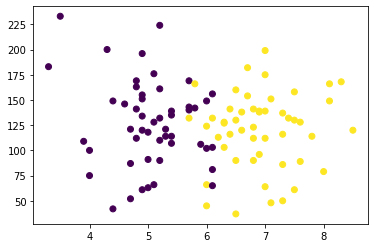

In [6]:
plt.scatter(data['cgpa'], data['iq'], c = data['placement'])

In [7]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [8]:
X = data.iloc[:,0:2]
y = data.iloc[:,-1]

In [9]:
X.head()

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142


In [10]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [13]:
print(X_train)
print(y_train)

    cgpa   iq
3    7.4  132
48   6.6  138
41   5.4  114
57   6.5  130
64   7.0   64
..   ...  ...
27   6.0  124
16   5.2  224
93   6.8  112
31   3.9  109
20   6.6  120

[90 rows x 2 columns]
3     1
48    1
41    0
57    1
64    1
     ..
27    1
16    0
93    1
31    0
20    1
Name: placement, Length: 90, dtype: int64


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.24545481,  0.17690184],
       [ 0.54977796,  0.32477645],
       [-0.49373732, -0.26672198],
       [ 0.46281835,  0.12761031],
       [ 0.89761638, -1.49901036],
       [-0.92853535, -0.11884737],
       [ 0.28889914, -0.53782542],
       [-1.45029299,  1.85281405],
       [ 1.85417206,  0.5958799 ],
       [-0.2328585 ,  0.37406799],
       [-1.01549496,  0.39871375],
       [-1.36333339, -2.04121725],
       [-0.49373732,  0.25083915],
       [ 0.02802032, -1.96727995],
       [-1.36333339,  0.5958799 ],
       [-0.84157575, -0.83357463],
       [-0.92853535, -1.57294767],
       [ 0.11497992,  0.76840027],
       [ 0.20193953, -0.29136774],
       [-0.92853535,  0.22619338],
       [ 0.72369717, -0.04491007],
       [-0.92853535,  0.64517143],
       [ 0.02802032,  0.5958799 ],
       [ 0.98457599, -1.89334265],
       [-0.05893929, -0.46388812],
       [ 1.1584952 , -0.95680347],
       [ 1.1584952 , -1.84405111],
       [-0.49373732,  0.34942222],
       [ 0.28889914,

In [16]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.28889914,  0.07831877],
       [-0.75461614,  0.07831877],
       [ 0.46281835, -0.8582204 ],
       [ 0.11497992, -1.4743646 ],
       [ 0.72369717, -0.8582204 ],
       [-0.1458989 ,  0.42335952],
       [ 1.59329324, -0.26672198],
       [ 0.63673756,  0.71910874],
       [ 0.81065678,  0.32477645],
       [-1.71117181, -1.22790692]])

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression()

In [19]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [22]:
y_test

63    1
86    0
79    1
56    0
35    1
4     0
55    1
74    1
11    1
68    0
Name: placement, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.9

In [26]:
from mlxtend.plotting import plot_decision_regions


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


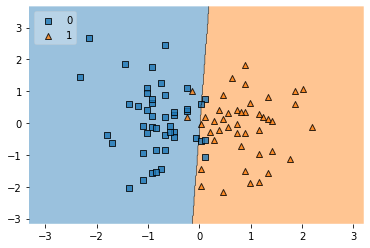

In [27]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [28]:
import pickle


In [29]:
pickle.dump(clf,open('model.pkl','wb'))
